In [4]:
# Install TensorFlow
# !pip install -q tensorflow-gpu==2.0.0-beta1

try:
  %tensorflow_version 2.x  # Colab only.
except Exception:
  pass

import tensorflow as tf
print(tf.__version__)

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `2.x  # Colab only.`. This will be interpreted as: `2.x`.


TensorFlow is already loaded. Please restart the runtime to change versions.
2.2.0-rc3


In [0]:
# additional imports

import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout, GlobalMaxPooling2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.models import Model

In [6]:
# Load in the data
cifar10 = tf.keras.datasets.cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train, y_test = y_train.flatten(), y_test.flatten()
print("x_train.shape:", x_train.shape)
print("y_train.shape", y_train.shape)

170500096/170498071 [==============================] - 6s 0us/step
x_train.shape: (50000, 32, 32, 3)
y_train.shape (50000,)


In [7]:
# number of classes
K = len(set(y_train))
print("number of classes:", K)

number of classes: 10


In [0]:
# Build the model using the functional API
i = Input(shape=x_train[0].shape)
# x = Conv2D(32, (3, 3), strides=2, activation='relu')(i)
# x = Conv2D(64, (3, 3), strides=2, activation='relu')(x)
# x = Conv2D(128, (3, 3), strides=2, activation='relu')(x)

x = Conv2D(32, (3, 3), activation='relu', padding='same')(i)
x = BatchNormalization()(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
# x = Dropout(0.2)(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
# x = Dropout(0.2)(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)
# x = Dropout(0.2)(x)

# x = GlobalMaxPooling2D()(x)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x)

model = Model(i, x)

In [0]:
# Compile
# Note: make sure you are using the GPU for this!
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [10]:
# Fit
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=50)

Epoch 1/50
1563/1563 [==============================] - 9s 6ms/step - loss: 1.2990 - accuracy: 0.5543 - val_loss: 1.0244 - val_accuracy: 0.6447
Epoch 2/50
1563/1563 [==============================] - 9s 6ms/step - loss: 0.8438 - accuracy: 0.7073 - val_loss: 0.8168 - val_accuracy: 0.7199
Epoch 3/50
1563/1563 [==============================] - 9s 6ms/step - loss: 0.6873 - accuracy: 0.7654 - val_loss: 0.7443 - val_accuracy: 0.7513
Epoch 4/50
1563/1563 [==============================] - 9s 6ms/step - loss: 0.5837 - accuracy: 0.7988 - val_loss: 0.6827 - val_accuracy: 0.7787
Epoch 5/50
1563/1563 [==============================] - 9s 6ms/step - loss: 0.4949 - accuracy: 0.8314 - val_loss: 0.7322 - val_accuracy: 0.7727
Epoch 6/50
1563/1563 [==============================] - 9s 6ms/step - loss: 0.4195 - accuracy: 0.8550 - val_loss: 0.6940 - val_accuracy: 0.7808
Epoch 7/50
1563/1563 [==============================] - 9s 6ms/step - loss: 0.3518 - accuracy: 0.8777 - val_loss: 0.6535 - val_accuracy:

In [11]:
# Fit with data augmentation
# Note: if you run this AFTER calling the previous model.fit(), it will CONTINUE training where it left off
batch_size = 32
data_generator = tf.keras.preprocessing.image.ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
train_generator = data_generator.flow(x_train, y_train, batch_size)
steps_per_epoch = x_train.shape[0] // batch_size
r = model.fit(train_generator, validation_data=(x_test, y_test), steps_per_epoch=steps_per_epoch, epochs=50)

Epoch 1/50
1562/1562 [==============================] - 24s 15ms/step - loss: 0.5382 - accuracy: 0.8277 - val_loss: 0.4906 - val_accuracy: 0.8398
Epoch 2/50
1562/1562 [==============================] - 24s 15ms/step - loss: 0.4339 - accuracy: 0.8561 - val_loss: 0.4516 - val_accuracy: 0.8474
Epoch 3/50
1562/1562 [==============================] - 23s 15ms/step - loss: 0.4043 - accuracy: 0.8639 - val_loss: 0.4621 - val_accuracy: 0.8487
Epoch 4/50
1562/1562 [==============================] - 24s 15ms/step - loss: 0.3779 - accuracy: 0.8757 - val_loss: 0.4500 - val_accuracy: 0.8528
Epoch 5/50
1562/1562 [==============================] - 24s 15ms/step - loss: 0.3677 - accuracy: 0.8760 - val_loss: 0.4529 - val_accuracy: 0.8551
Epoch 6/50
1562/1562 [==============================] - 24s 15ms/step - loss: 0.3500 - accuracy: 0.8830 - val_loss: 0.4519 - val_accuracy: 0.8555
Epoch 7/50
1562/1562 [==============================] - 24s 15ms/step - loss: 0.3394 - accuracy: 0.8868 - val_loss: 0.4191 -

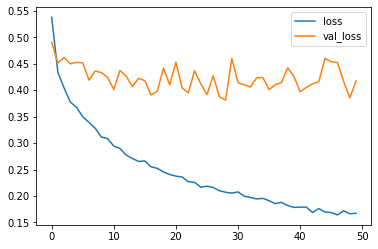

In [13]:
# Plot loss per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

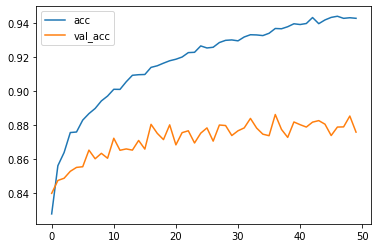

In [14]:
# Plot accuracy per iteration
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

Confusion matrix, without normalization
[[928   6  16   6   5   3   7   4  12  13]
 [  7 946   1   2   0   1   2   1   4  36]
 [ 36   2 788  29  43  24  60  12   2   4]
 [ 12   3  25 762  29  82  63  16   3   5]
 [  6   0  22  29 851   9  70  13   0   0]
 [  8   2  14 111  26 781  35  21   1   1]
 [  3   2   5  17   3   0 967   0   2   1]
 [  9   1   4  22  27  18  10 904   1   4]
 [ 45  14   4   3   2   2  15   1 899  15]
 [  7  37   2   3   1   1   7   2   7 933]]


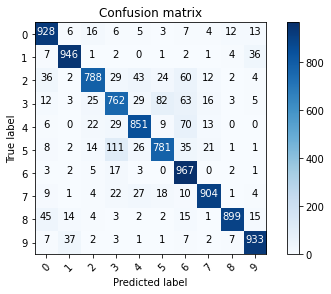

In [15]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))



In [0]:
# label mapping
labels = '''airplane
automobile
bird
cat
deer
dog
frog
horse
ship
truck'''.split()

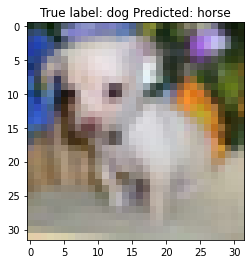

In [17]:
# Show some misclassified examples
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title("True label: %s Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]));

In [19]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496 

In [0]:
model.save('TF2.0_CIFER10_CNN_ACC_IMPROVEMENT.h5')